### Классификация: превышает ли значение SI значение 8

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_scaled = pd.read_csv('df_scaled.csv')

In [3]:
df_scaled.shape

(969, 188)

In [4]:
df_scaled.head()

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.599333,-0.648886,0.023693,-1.766931,-1.766931,1.230105,0.859969,-0.751719,1.076111,0.260487,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,2.268081,-0.085302
1,-0.623447,-0.917447,-0.258103,-2.112017,-2.112017,2.098636,0.953566,-0.540135,1.257528,0.292155,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,2.268081,-0.085302
2,0.360199,-0.671529,-0.341875,-2.518530,-2.518530,2.154087,0.959542,-1.485466,1.017293,0.748665,...,6.379466,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,2.268081,-0.085302
3,-0.619328,-0.755671,0.492044,-1.765937,-1.765937,1.250111,0.862125,-0.937063,0.991464,0.370656,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,3.080565,-0.085302
4,-0.154375,-0.706065,-0.334138,-1.749744,-1.749744,0.538633,0.785453,-0.696952,0.567012,0.905000,...,-0.179370,-0.211946,-0.111979,-0.096825,-0.032141,-0.032141,-0.238132,-0.274721,-0.169372,-0.085302


***Сравнены различные модели с настройкой гиперпараметров, сделаны выводы о применимости методов, даны рекомендации по улучшению***

In [6]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Подготовка данных (замените df_scaled на ваши данные)
X = df_scaled.drop(columns=['IC50', 'CC50', 'SI'])  # Признаки
y = df_scaled['SI']  # Целевая переменная 

# Преобразование в задачу классификации: SI > 8 ?
y_class = (y > 8).astype(int)

# Разделение на train/test с сохранением пропорций
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

def train_and_evaluate_models(X_train, y_train, X_test, y_test, models):
    """
    Обучение и оценка переданных моделей.

    Args:
    - X_train: Обучающие признаки
    - y_train: Обучающие целевые переменные
    - X_test: Тестовые признаки
    - y_test: Тестовые целевые переменные
    - models: Словарь моделей для обучения и оценки

    Returns:
    - DataFrame с результатами
    """
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba)
        })

    return pd.DataFrame(results)

# Список моделей для сравнения
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),  # Убрали use_label_encoder
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Обучение и оценка моделей
results_df = train_and_evaluate_models(X_train, y_train, X_test, y_test, models)

# Вывод результатов
print(results_df)


[LightGBM] [Info] Number of positive: 3, number of negative: 772
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16846
[LightGBM] [Info] Number of data points in the train set: 775, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003871 -> initscore=-5.550372
[LightGBM] [Info] Start training from score -5.550372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

***Визуализация результата***

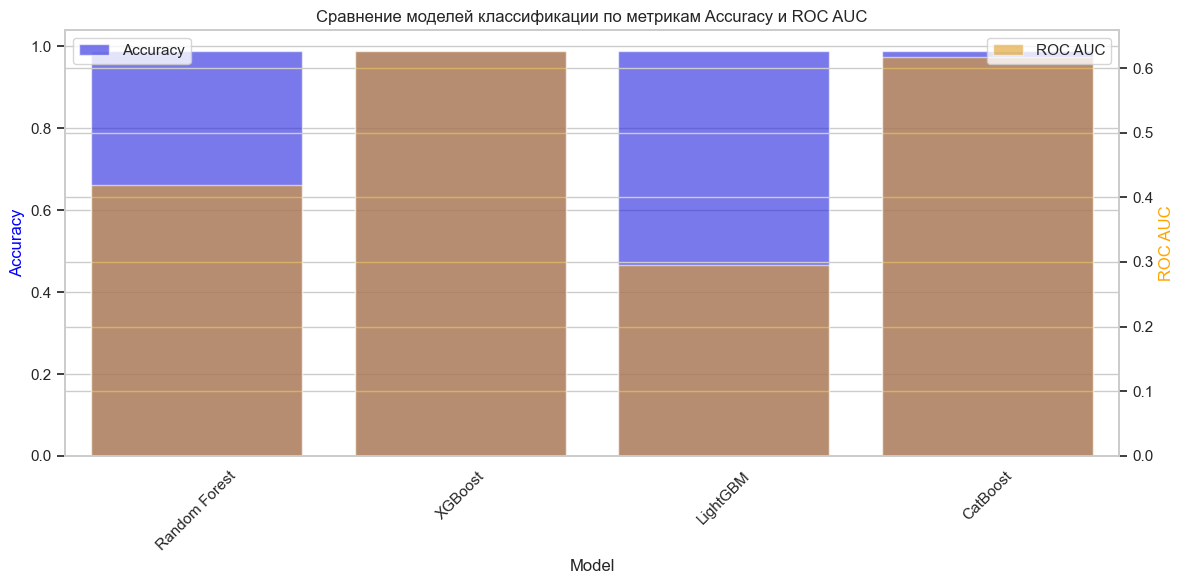

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настроим стиль визуализации
sns.set(style="whitegrid")

# Создаем фигуру с подграфиками
fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбцы с точностью
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=ax1, color='blue', label='Accuracy', alpha=0.6)

# Создаем второй ось y для ROC AUC
ax2 = ax1.twinx()
sns.barplot(x='Model', y='ROC AUC', data=results_df, ax=ax2, color='orange', label='ROC AUC', alpha=0.6)

# Настройки графиков
ax1.set_ylabel('Accuracy', color='blue')
ax2.set_ylabel('ROC AUC', color='orange')
ax1.set_title('Сравнение моделей классификации по метрикам Accuracy и ROC AUC')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Выравниваем метки по оси X
ax1.set_xticks(range(len(results_df)))  # Задаем фиксированные метки на оси X
ax1.set_xticklabels(results_df['Model'], rotation=45)

# Показываем график
plt.tight_layout()
plt.show()


*Общие выводы*
- Высокая точность (Accuracy):
- Все модели демонстрируют одинаковое значение точности — 98.97%. Это указывает на то, что каждая из моделей предоставляет хорошие результаты в классификации.
- Различия в AUC (ROC AUC):
Несмотря на одинаковую точность, модели показывают значительные различия в значениях ROC AUC:
- *XGBoost:* 0.626943 — наилучший показатель среди всех моделей, что указывает на хорошее качество классификации, особенно для не сбалансированных классов.
- *CatBoost:* 0.616580 — близок к XGBoost, также показывает неплохие результаты.
- *Random Forest:* 0.419689 — значительно ниже, что может указывать на более низкую способность модели к разделению классов.
- *LightGBM:* 0.295337 — наименьший показатель, что может свидетельствовать о слабой производительности на данном наборе данных.
Контрарное сочетание:
Все модели имеют высокую точность, но различия в ROC AUC подчеркивают, что высокая точность не всегда подразумевает хорошую способность к различению классов. Следует использовать ROC AUC для более осмысленной оценки.